# Weight Initialization Impact

## Import Dataset MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

X: np.ndarray  # input
y: np.ndarray  # target

# Load data from https://www.openml.org/search?type=data&sort=runs&id=554   
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

 
# MNIST: dataset of 28x28 pixel images of handwritten digits (0-9)
# Input: vector of 784 pixels (28x28)
# Target: number 0-9

In [2]:
X.shape, y.shape

((70000, 784), (70000,))

## Use only 1000 data

In [3]:
X, y = X[:1000], y[:1000]

In [4]:
X, y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(1000, 784)),
 array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4', '3', '5', '3',
        '6', '1', '7', '2', '8', '6', '9', '4', '0', '9', '1', '1', '2',
        '4', '3', '2', '7', '3', '8', '6', '9', '0', '5', '6', '0', '7',
        '6', '1', '8', '7', '9', '3', '9', '8', '5', '9', '3', '3', '0',
        '7', '4', '9', '8', '0', '9', '4', '1', '4', '4', '6', '0', '4',
        '5', '6', '1', '0', '0', '1', '7', '1', '6', '3', '0', '2', '1',
        '1', '7', '9', '0', '2', '6', '7', '8', '3', '9', '0', '4', '6',
        '7', '4', '6', '8', '0', '7', '8', '3', '1', '5', '7', '1', '7',
        '1', '1', '6', '3', '0', '2', '9', '3', '1', '1', '0', '4', '9',
        '2', '0', '0', '2', '0', '2', '7', '1', '8', '6', '4', '1', '6',
        '3', '4', '5', '9', '1', '3', 

### Onehot Encode

In [5]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(X):
    encoder = OneHotEncoder(sparse_output=False)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    one_hot_encoded = encoder.fit_transform(X)
    return one_hot_encoded

In [6]:
y_encoded = one_hot_encode(y)
print(y_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Import Model

In [7]:
import sys
import os

# Get the absolute path of the src directory
sys.path.append(os.path.abspath('../')) 

from model.ffnn import FFNN
from graph.visualize import Visualizer

### Testing Effect of Weight Inialization

All model uses the same settings.

### 1) Zero Initialization


In [8]:
ffnn1 = FFNN([784, 8, 4, 10], loss="mse", active=["sigmoid", "tanh", "relu"], seed=69, weight="zero")
ffnn1

Feed Forward Neural Network
> Layers: [784, 8, 4, 10]
> MLP of 3 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)])
	Layer(label=Hidden-Layer-2, neurons=[
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N1)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N2)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N3)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N4)])
	Layer(label=Output-Layer, neurons=[
	Neuron(nin=4, activation=relu, label=Output-Layer_N1)
	Neuron(nin=4, activation=re

In [9]:
loss1, loss1_history = ffnn1.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [02:43<10:54, 163.72s/it]

Training Loss: 0.1
Validation Loss: 0.1

Starting Epoch 1


 40%|████      | 2/5 [05:57<09:04, 181.58s/it]

Training Loss: 0.1
Validation Loss: 0.1

Starting Epoch 2


 60%|██████    | 3/5 [09:25<06:26, 193.44s/it]

Training Loss: 0.1
Validation Loss: 0.1

Starting Epoch 3


 80%|████████  | 4/5 [12:55<03:19, 199.87s/it]

Training Loss: 0.1
Validation Loss: 0.1

Starting Epoch 4


100%|██████████| 5/5 [16:22<00:00, 196.43s/it]

Training Loss: 0.1
Validation Loss: 0.1



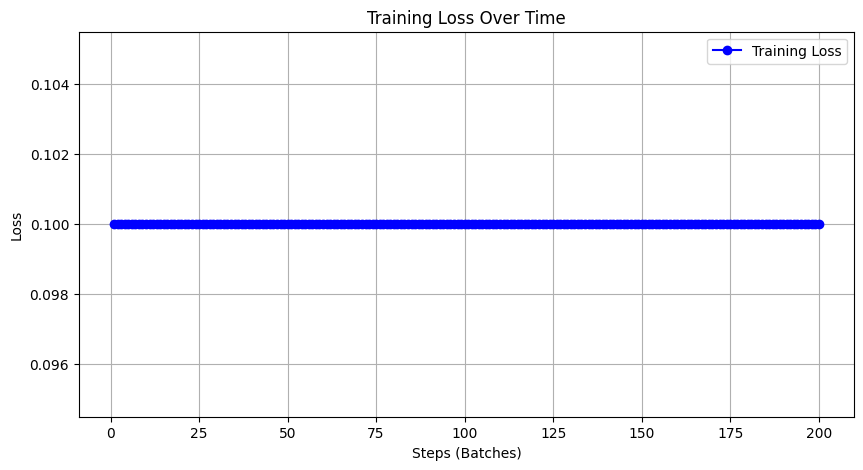

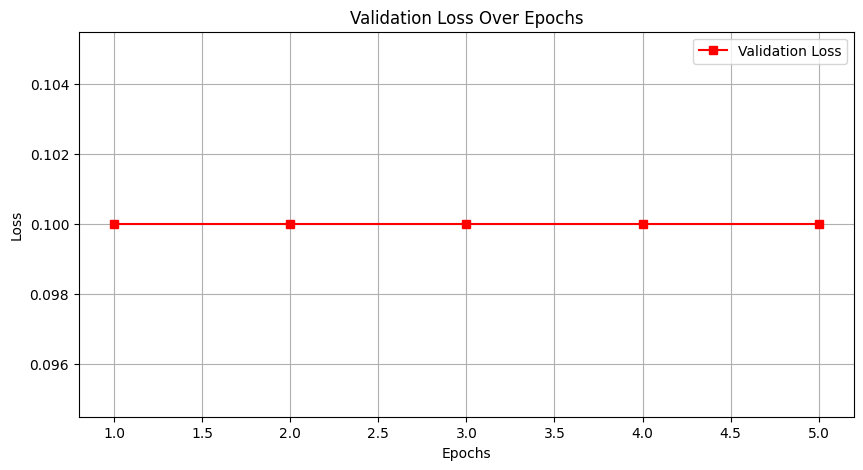

In [10]:
Visualizer.plot_loss_history(loss1_history)

### 2) Normal Distribution

In [11]:
ffnn2 = FFNN([784, 8, 4, 10], loss="mse", active=["sigmoid", "tanh", "relu"], seed=69, weight="normal", mean=0.5, variance=1)
ffnn2

Feed Forward Neural Network
> Layers: [784, 8, 4, 10]
> MLP of 3 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)])
	Layer(label=Hidden-Layer-2, neurons=[
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N1)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N2)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N3)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N4)])
	Layer(label=Output-Layer, neurons=[
	Neuron(nin=4, activation=relu, label=Output-Layer_N1)
	Neuron(nin=4, activation=re

In [12]:
loss2, loss2_history = ffnn2.training(X, y_encoded, 20, 0.01, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [03:02<12:08, 182.11s/it]

Training Loss: 2.896870707589629
Validation Loss: 2.8410173636481075

Starting Epoch 1


 40%|████      | 2/5 [06:29<09:51, 197.06s/it]

Training Loss: 2.8408548638912294
Validation Loss: 2.786277108341785

Starting Epoch 2


 60%|██████    | 3/5 [10:16<07:01, 210.57s/it]

Training Loss: 2.7859537338232467
Validation Loss: 2.7326277751524337

Starting Epoch 3


 80%|████████  | 4/5 [13:46<03:30, 210.57s/it]

Training Loss: 2.732145134617462
Validation Loss: 2.680047638835742

Starting Epoch 4


100%|██████████| 5/5 [17:13<00:00, 206.78s/it]

Training Loss: 2.6794073249420394
Validation Loss: 2.6285154066382987



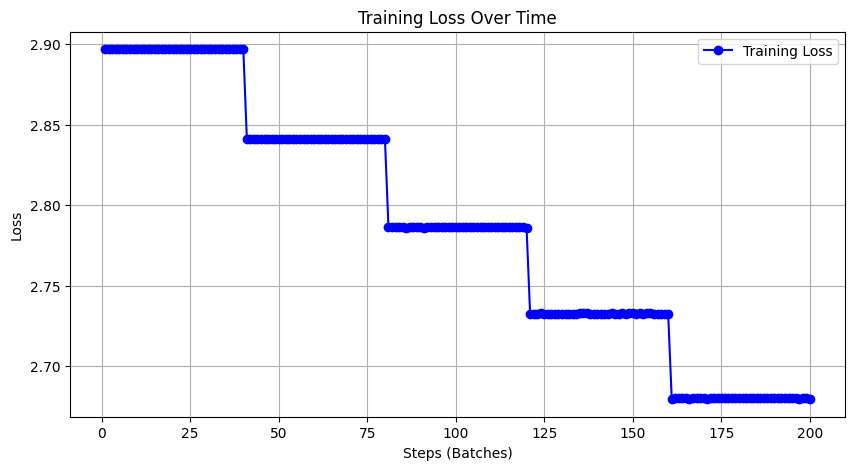

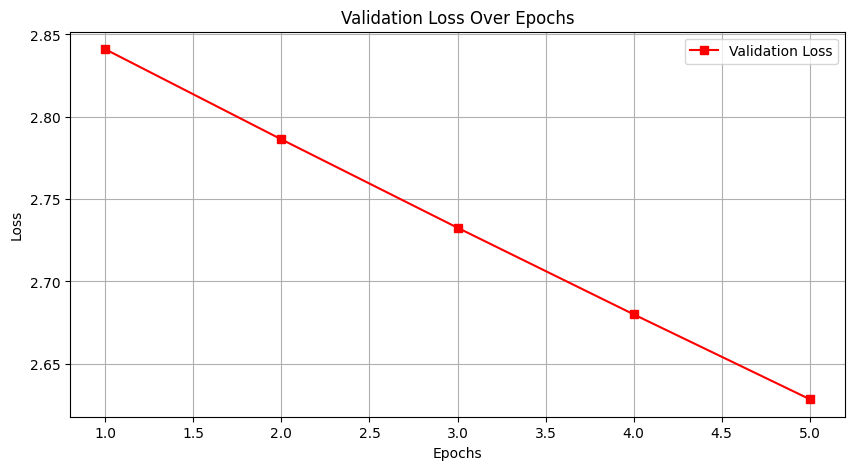

In [13]:
Visualizer.plot_loss_history(loss2_history)

### 2) Uniform Distribution

In [16]:
ffnn3 = FFNN([784, 8, 4, 10], loss="mse", active=["sigmoid", "tanh", "relu"], seed=69, weight="uniform", lower_bound =0, upper_bound=1)
ffnn3

Feed Forward Neural Network
> Layers: [784, 8, 4, 10]
> MLP of 3 Layers [
	Layer(label=Hidden-Layer-1, neurons=[
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N1)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N2)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N3)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N4)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N5)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N6)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N7)
	Neuron(nin=784, activation=sigmoid, label=Hidden-Layer-1_N8)])
	Layer(label=Hidden-Layer-2, neurons=[
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N1)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N2)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N3)
	Neuron(nin=8, activation=tanh, label=Hidden-Layer-2_N4)])
	Layer(label=Output-Layer, neurons=[
	Neuron(nin=4, activation=relu, label=Output-Layer_N1)
	Neuron(nin=4, activation=re

In [17]:
loss3, loss3_history = ffnn3.training(X, y_encoded, 20, 0.001, 5, 1, 0.8)

  0%|          | 0/5 [00:00<?, ?it/s]

Starting Epoch 0


 20%|██        | 1/5 [03:09<12:38, 189.53s/it]

Training Loss: 7.404192201200848
Validation Loss: 7.389589599368569

Starting Epoch 1


 40%|████      | 2/5 [06:33<09:54, 198.32s/it]

Training Loss: 7.389573370801301
Validation Loss: 7.375016171183404

Starting Epoch 2


 60%|██████    | 3/5 [10:01<06:45, 202.60s/it]

Training Loss: 7.3749837302589905
Validation Loss: 7.360471858365303

Starting Epoch 3


 80%|████████  | 4/5 [13:18<03:20, 200.45s/it]

Training Loss: 7.360423221277931
Validation Loss: 7.34595660275146

Starting Epoch 4


100%|██████████| 5/5 [16:43<00:00, 200.60s/it]

Training Loss: 7.345891785678532
Validation Loss: 7.331470346294391



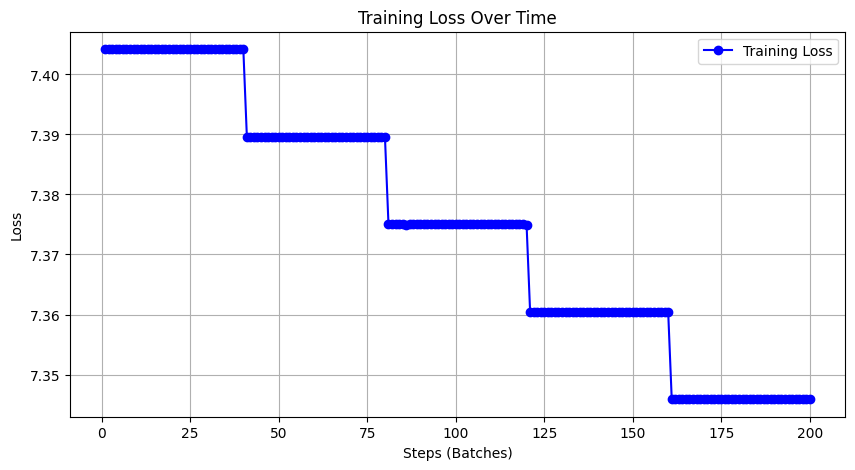

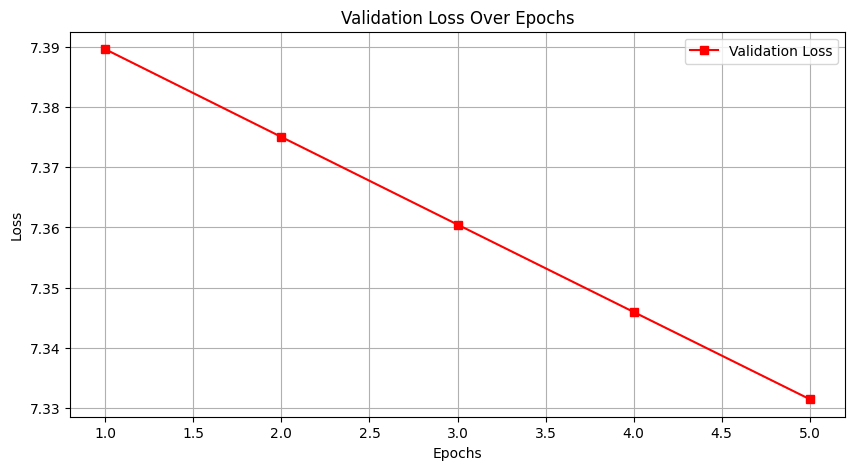

In [18]:
Visualizer.plot_loss_history(loss3_history)

### Compared all results

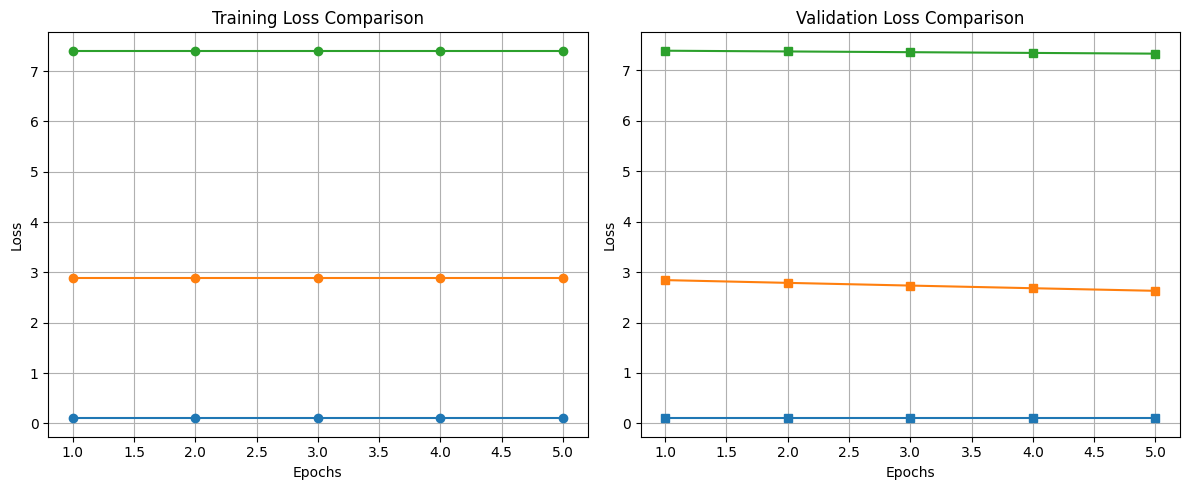

In [19]:
Visualizer.compare_loss_histories([loss1_history, loss2_history, loss3_history])

# Comparing The Weight Distribution

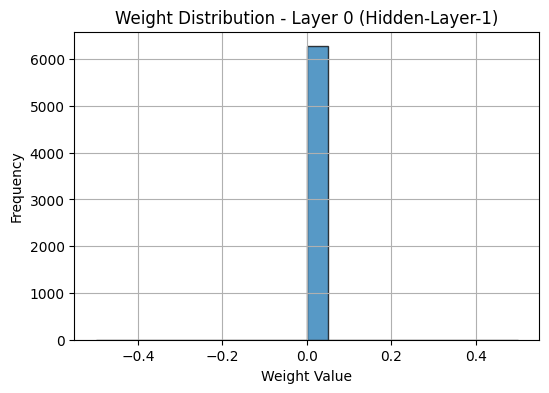

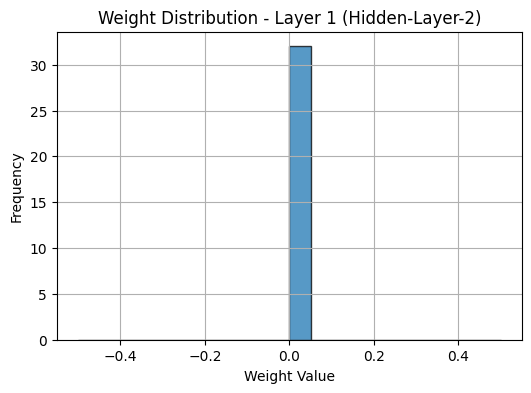

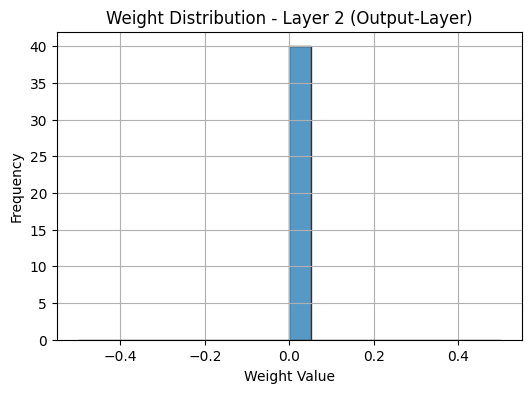

In [20]:
ffnn1.plot_weight_distribution([0,1,2])

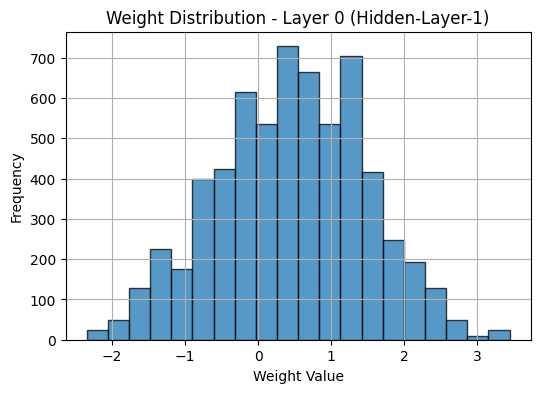

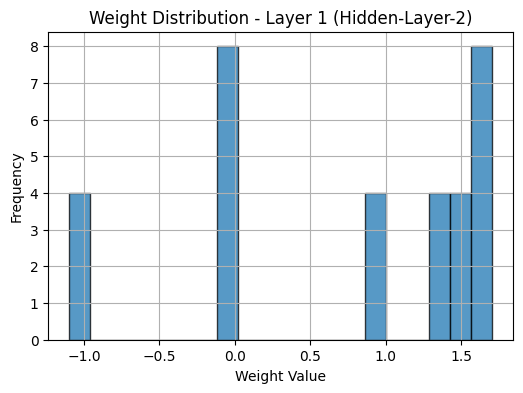

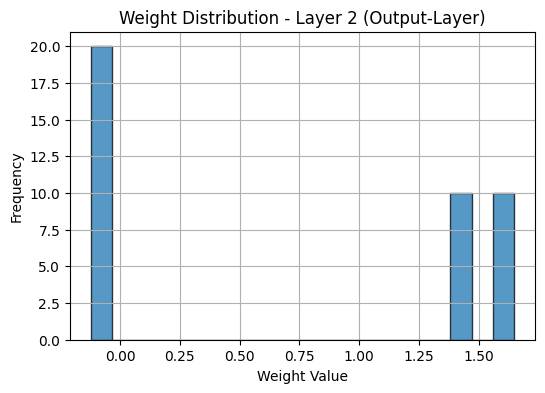

In [21]:
ffnn2.plot_weight_distribution([0,1,2])

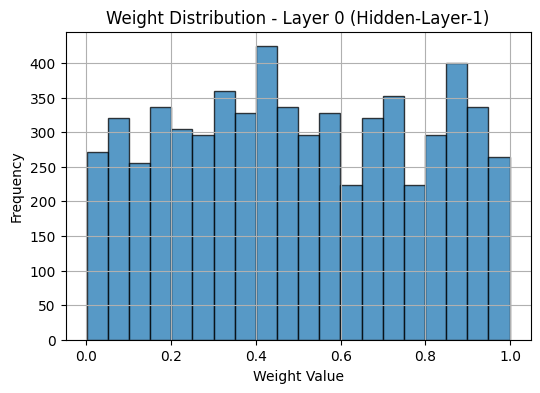

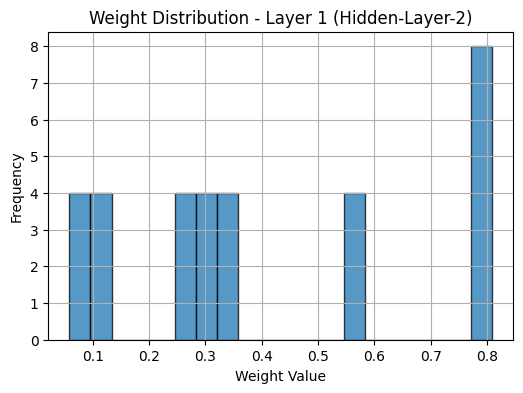

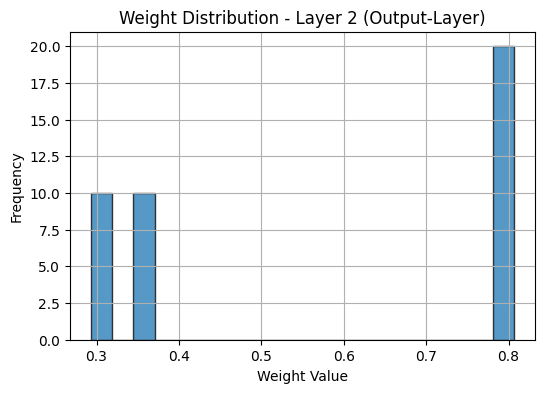

In [22]:
ffnn3.plot_weight_distribution([0,1,2])

# Comparing The Gradient Distribution

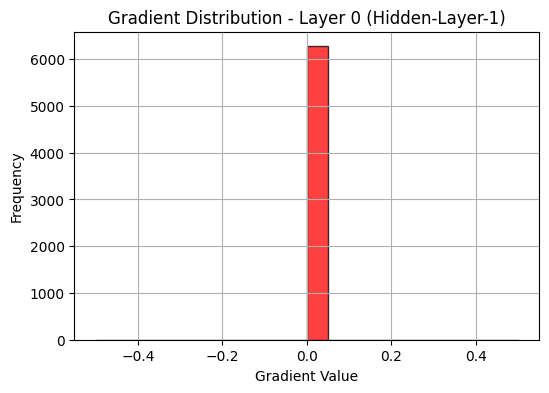

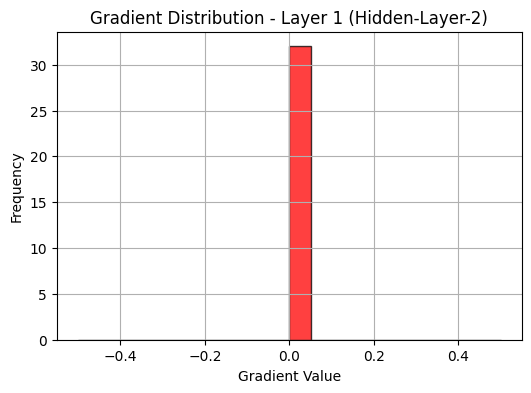

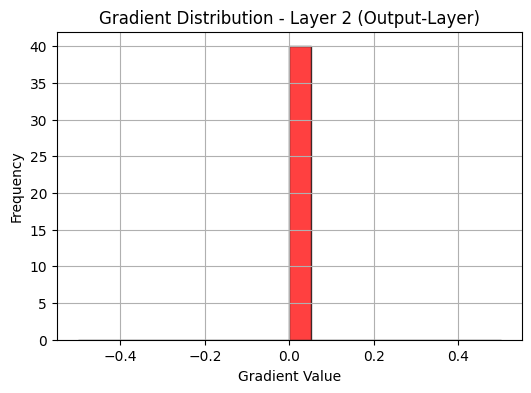

In [23]:
ffnn1.plot_gradient_distribution([0,1,2])

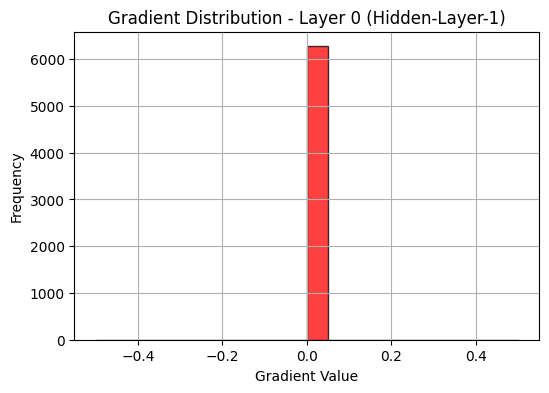

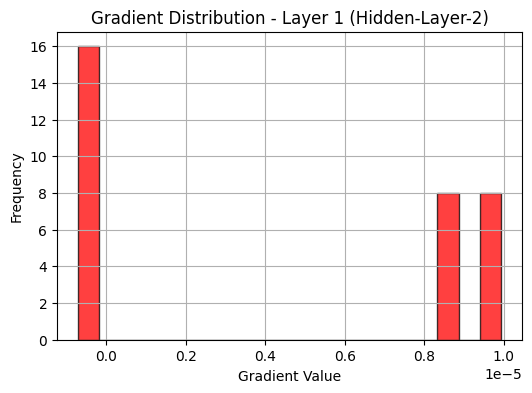

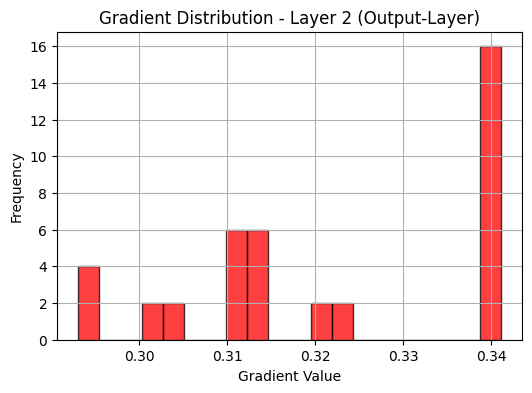

In [24]:
ffnn2.plot_gradient_distribution([0,1,2])

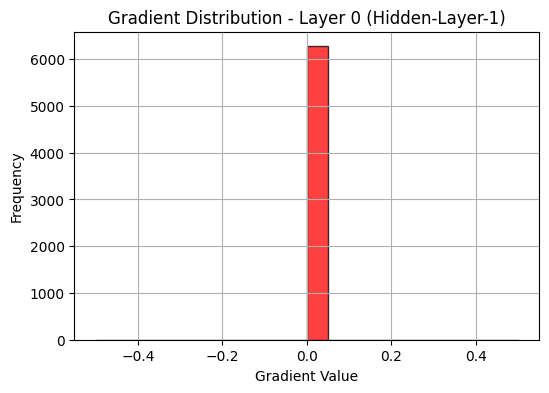

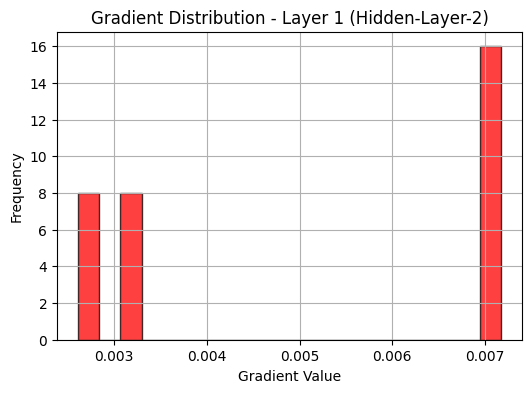

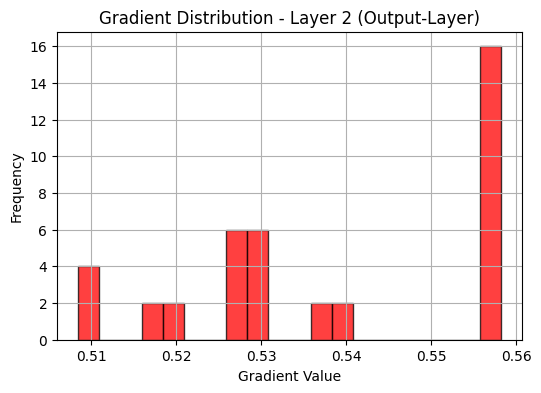

In [25]:
ffnn3.plot_gradient_distribution([0,1,2])